In [3]:
import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import spacy
import sklearn
from textblob import TextBlob

tb= TextBlob
#Folders
DATA_FOLDER_RateBeer ='D:/Master/Cours/MA3/ADA2023/Project/Data/Rate_beer_data/'
DATA_FOLDER_MatchedBeer ='D:/Master/Cours/MA3/ADA2023/Project/Data/matched_beer_data/'
DATA_FOLDER_BeerAdvocate ='D:/Master/Cours/MA3/ADA2023/Project/Data/BeerAdvocate_data/'

#files in function of the folders
#files of RateBeer folder
BEERS_RateBeer_DATASET = DATA_FOLDER_RateBeer + "beers.csv"
BREWERIES_RateBeer_DATASET=DATA_FOLDER_RateBeer + "breweries.csv"
USERS_RateBeer_DATASET=DATA_FOLDER_RateBeer+"users.csv"
#files of BeerAdvocate
BEERS_BeerAdvocate_DATASET = DATA_FOLDER_BeerAdvocate + "beers.csv"
BREWERIES_BeerAdvocate_DATASET=DATA_FOLDER_BeerAdvocate + "breweries.csv"
USERS_BeerAdvocate_DATASET=DATA_FOLDER_BeerAdvocate+"users.csv"
#files of matched_beer_data
BEERS_MatchedBeer_DATASET = DATA_FOLDER_MatchedBeer + "beers.csv"
BREWERIES_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer + "breweries.csv"
USERS_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer+"users.csv"
RATINGS_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer+"ratings.csv"
USERS_APPROX_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer+"users_approx.csv"


In [4]:
beers_RateBeer=pd.read_csv(BEERS_RateBeer_DATASET, header=1)
breweries_RateBeer=pd.read_csv(BREWERIES_RateBeer_DATASET, header=1)
users_RateBeer=pd.read_csv(USERS_RateBeer_DATASET, header=1)
beers_BeerAdvocate=pd.read_csv(BEERS_BeerAdvocate_DATASET, header=1)
breweries_BeerAdvocate=pd.read_csv(BREWERIES_BeerAdvocate_DATASET, header=1)
users_BeerAdvocate=pd.read_csv(USERS_BeerAdvocate_DATASET, header=1)
beers_MatchedBeer=pd.read_csv(BEERS_MatchedBeer_DATASET, header=1)
breweries_MatchedBeer=pd.read_csv(BREWERIES_MatchedBeer_DATASET, header=1)
users_MatchedBeer=pd.read_csv(USERS_MatchedBeer_DATASET, header=1)
users_approx_MatchedBeer=pd.read_csv(USERS_APPROX_MatchedBeer_DATASET, header=1)
ratings_MatchedBeer=pd.read_csv(RATINGS_MatchedBeer_DATASET, header=1, low_memory=False)

In [5]:
ratings_MatchedBeer_BA=ratings_MatchedBeer[ratings_MatchedBeer.columns[:16]]
ratings_MatchedBeer_RB=ratings_MatchedBeer[ratings_MatchedBeer.columns[17:32]]
ratings_MatchedBeer_BA=ratings_MatchedBeer_BA[~ratings_MatchedBeer_BA['text'].isnull()]
ratings_MatchedBeer_RB=ratings_MatchedBeer_RB[~ratings_MatchedBeer_RB['text.1'].isnull()]
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("()", "")
    ReviewText = ReviewText.str.replace('().*()', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
ratings_MatchedBeer_BA['text']= preprocess(ratings_MatchedBeer_BA['text'])
ratings_MatchedBeer_RB['text.1']= preprocess(ratings_MatchedBeer_RB['text.1'])

#Beer advocate sentiment polarity
ratings_MatchedBeer_BA['polarity'] = ratings_MatchedBeer_BA['text'].map(lambda text: tb(text).sentiment.polarity)
ratings_MatchedBeer_BA['review_len'] = ratings_MatchedBeer_BA['text'].astype(str).apply(len)
ratings_MatchedBeer_BA['word_count'] = ratings_MatchedBeer_BA['text'].apply(lambda x: len(str(x).split()))

#Rating Beer sentiment polarity
ratings_MatchedBeer_RB['polarity'] = ratings_MatchedBeer_RB['text.1'].map(lambda text: tb(text).sentiment.polarity)
ratings_MatchedBeer_RB['review_len'] = ratings_MatchedBeer_RB['text.1'].astype(str).apply(len)
ratings_MatchedBeer_RB['word_count'] = ratings_MatchedBeer_RB['text.1'].apply(lambda x: len(str(x).split()))

In [6]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB.polarity == 1, ['text.1']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Has a feint scent of caramel, taste is awesome mix of alcohol and toffee. St. Paul Beer Fest---Rated via Beer Buddy for iPhone
Uhhhh yum! Tastes like nutella overlaid a chocolate biscuit. Delicious. Desert. Meal. nitro tap at rogue in pdx. Some vanilla wafer aromas. Canât wait for my pizza to come...
Really excellent aroma with toffee, caramel, fruit, hops, toast, grass. Flavorâs like nose, but thereâs a hint of medicine in the finish. Otherwise itâs just smack dab on.
on tap at the source. newest release. excellent apa bursting with galaxy and nelson. citrus hops also in aroma.
Forte amertume persistante en bouche. Bon retour. Orange, raisins, agrumes et un peu dâÃ©pices. Une excellent IPA !


In [7]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB.polarity == 0, ['text.1']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Bela apresentaÃ§Ã£o da garrafa, o estampido da rolha traz um tchan Ã  cerveja. AparÃªncia: corpo negro translÃºcido, com nuances de vermelho no topo; devido Ã  temperatura ausÃªncia de espuma. Aroma: doce, caramelo. Sabor: simples, ao destacar o Ã¡lcool em detrimento de outros aromas, levemente amadeirado como um conhaque. Dose mÃ­nima: R$ 5,63.
Canette 355ml. Couleur jaune dorÃ© limpide, mousse blanche Ã©vanescente laissant un anneau sur les parois du verre. ArÃ´me citronnÃ©, pointe salÃ©e, blÃ©, lime, cÃ´tÃ© fraÃ®cheur, malt, yogourt, grains de coriandre. GoÃ»t de citron, lÃ©gÃ¨rement salÃ©, touche de coriandre, malt. Carbonatation moyenne-Ã©levÃ©e, corps moyen-faible.
Do tap: uma bela cor Ã¢mbar, com espuma bege de boa formaÃ§Ã£o e retenÃ§Ã£o. Aroma de malte torrado, cafÃ© frutado, cÃ­trico. O sabor do cafÃ© Ã© discreto, o malte adocicado predomina, seguido por um leve amargor. O retrogosto Ã© amargo, mas desaparece 

In [8]:
ratings_MatchedBeer_RB.polarity

0        0.177778
1        0.293889
2        0.170833
3        0.165972
4        0.030612
           ...   
21959    0.133254
21960    0.000000
21961    0.000000
21962    0.300000
21963    0.115390
Name: polarity, Length: 21964, dtype: float64

In [9]:
print('2 reviews with the most negative polarity: \n')
cl = ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB.polarity <0, ['text.1']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

With a name like that, and the color it had, I was expecting a flemish sour.  As usual, I was wrong!  The bottle did say it was brewed based on an XVIII century recipe.Peachy copper, with a thick ring of lace.Very sweet malt nose, with strong notes of honey, with no hop presence at all (I donât think any were added).  It smells just like a mead.Quite malty, with a smoky middle and an earthy, maplewood finish.  The bottle also says that sassafras was used, maybe thatâs where the earthyness comes from.  An intersting Beer experiment from a cool little brewery south of Metz.
Pours a clear gold color with a decent white foamy head that settles down quickly.The aroma of malts is pretty straigtforward. Not much else there.The taste is pleasantly bitter, thankfully not sweet, although slightly watery.Despite that still very drinkable and enjoyable.Not bad.


<Axes: ylabel='Frequency'>

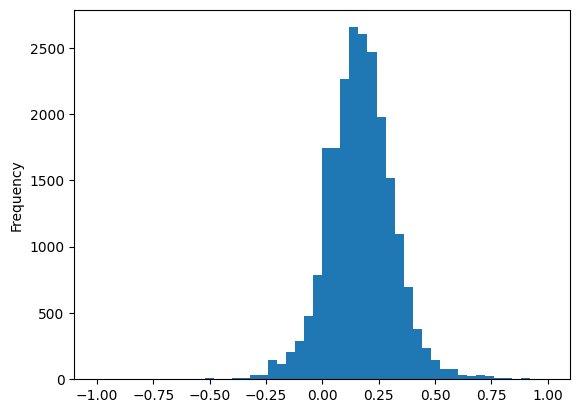

In [10]:
ratings_MatchedBeer_RB['polarity'].plot(kind='hist', bins=50)

<Axes: xlabel='style.1'>

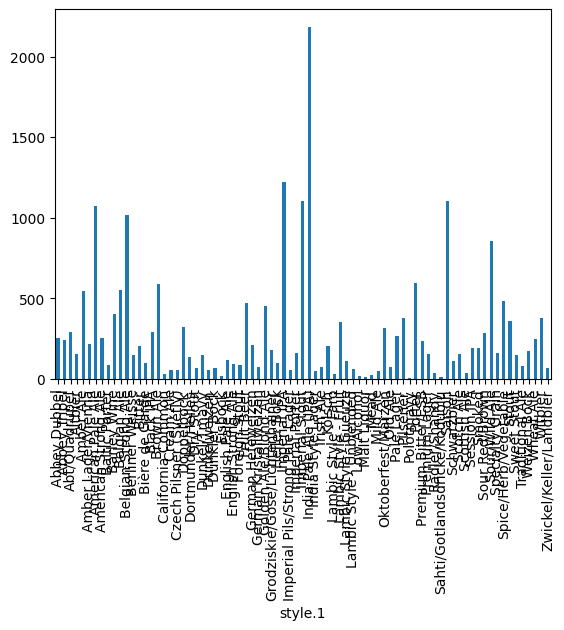

In [11]:
ratings_MatchedBeer_RB.groupby('style.1').count()['beer_id.1'].plot(kind='bar')

<Axes: xlabel='brewery_id.1'>

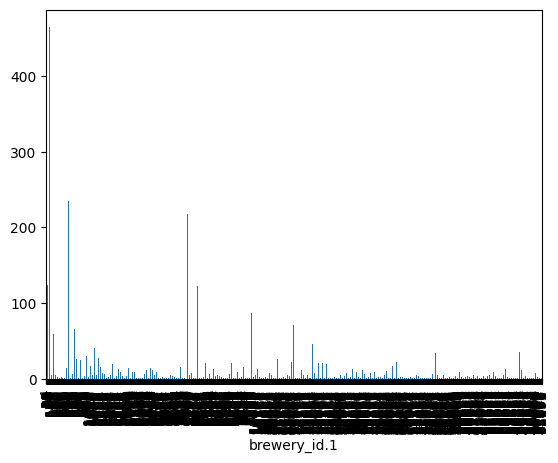

In [12]:
ratings_MatchedBeer_RB.groupby('brewery_id.1').count()['beer_id.1'].plot(kind='bar')

In [13]:
y0=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'Pale Lager']['polarity']
y1=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'Golden Ale/Blond Ale']['polarity']
y2=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'India Pale Ale (IPA)']['polarity']
y3=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'Lambic Style - Fruit']['polarity']
y4=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'American Pale Ale']['polarity']


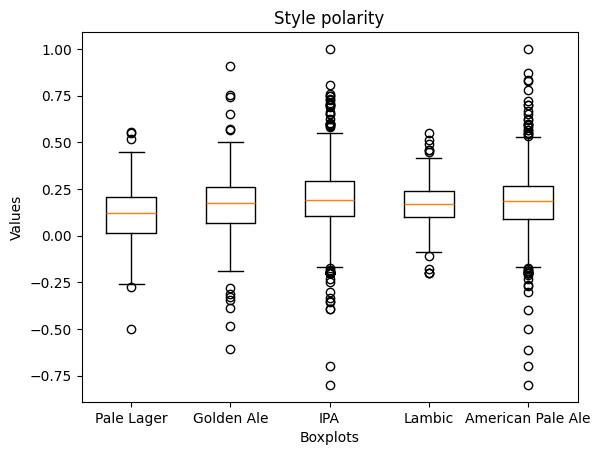

In [14]:
data = [y0, y1, y2, y3, y4]

# Create a boxplot
plt.boxplot(data)

# Set x-axis ticks and labels
plt.xticks([1, 2, 3, 4, 5], ['Pale Lager', 'Golden Ale', 'IPA', 'Lambic', 'American Pale Ale'])

# Add labels and title
plt.xlabel('Boxplots')
plt.ylabel('Values')
plt.title('Style polarity')

# Show the plot
plt.show()

# Distribution of top unigrams before removing stop words

the 68074
and 67280
of 45857
with 45557
is 33964
to 19826
head 17436
in 16117
this 15710
light 15073
it 14683
on 14588
but 14571
very 14066
some 13090
that 12698
aroma 12237
beer 12125
malt 11416
taste 11225


<Axes: title={'center': 'Top 20 words in review before removing stop words'}, xlabel='Review Text'>

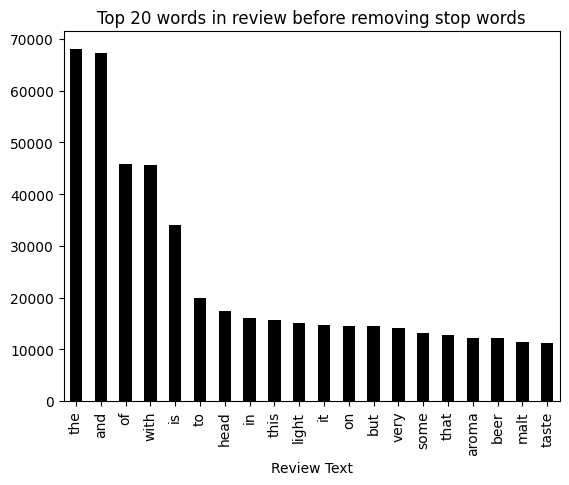

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(ratings_MatchedBeer_RB['text.1'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Review Text', 'count'])
df1.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 words in review before removing stop words')

# Distribution of top unigrams after removing stop words

head 17436
light 15073
aroma 12237
beer 12125
malt 11416
taste 11225
nice 10718
good 10705
medium 10427
finish 9833
body 9435
white 9395
dark 8999
sweet 8662
carbonation 8567
flavor 8343
hops 8011
bottle 7867
bit 7842
color 7244


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='Review Text'>

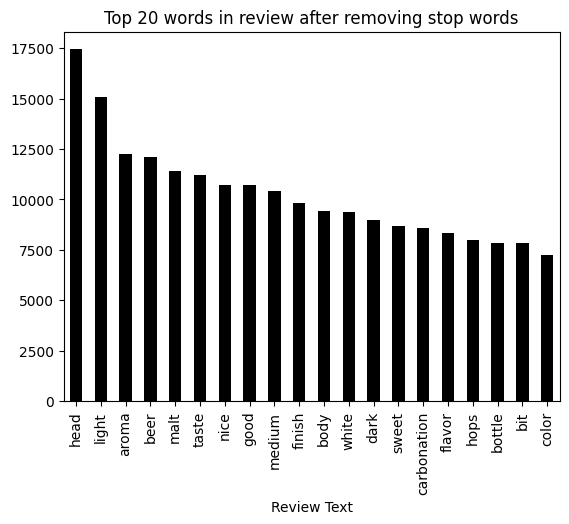

In [16]:
def get_top_filtered_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_filtered_n_words(ratings_MatchedBeer_RB['text.1'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Review Text' , 'count'])
df2.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 words in review after removing stop words')

# Distribution of top bigrams before removing stop words

white head 6994
on the 6391
in the 6058
the finish 5198
color with 4604
of the 4287
the aroma 3892
aroma is 3847
this is 3709
bit of 3548
taste is 3430
with some 3108
the taste 2998
body with 2939
head that 2900
at the 2878
the beer 2776
the flavor 2644
the glass 2575
off white 2554


<Axes: title={'center': 'Top 20 bigrams in review before removing stop words'}, xlabel='Review Text'>

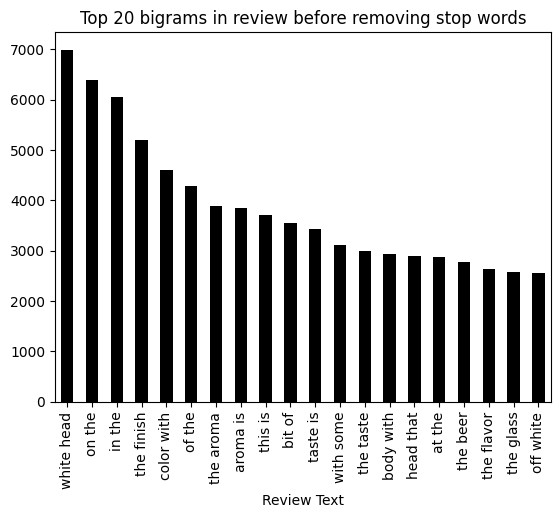

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_bigrams = get_top_n_bigram(ratings_MatchedBeer_RB['text.1'], 20)
for bigram, freq in common_bigrams:
    print(bigram, freq)
df3 = pd.DataFrame(common_bigrams, columns = ['Review Text', 'count'])
df3.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 bigrams in review before removing stop words')

# Distribution of top bigrams after removing stop words

white head 7005
medium body 2533
head aroma 2350
medium carbonation 1761
medium bodied 1576
tan head 1559
dark brown 1539
bready malt 1222
brown sugar 1148
mouthfeel medium 1129
roasted malt 1080
lacing aroma 1077
body medium 987
amber color 978
golden color 963
head good 935
iâ ve 917
dry finish 912
orange peel 903
light body 893


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='Review Text'>

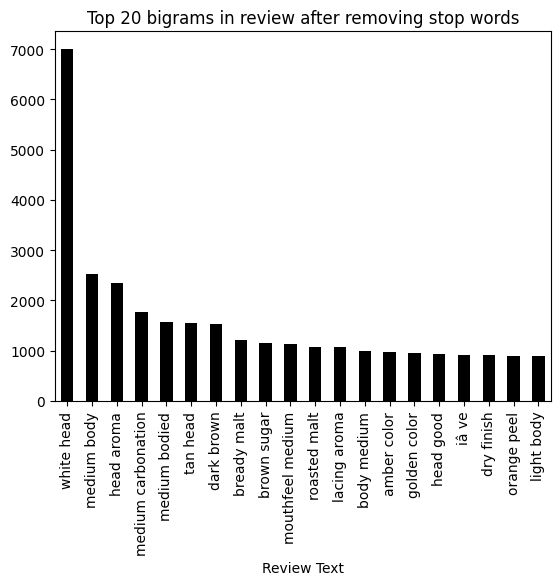

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_bigrams = get_top_n_bigram(ratings_MatchedBeer_RB['text.1'], 20)
for bigram, freq in common_bigrams:
    print(bigram, freq)
df3 = pd.DataFrame(common_bigrams, columns = ['Review Text', 'count'])
df3.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 bigrams in review after removing stop words')

# Distribution of top trigrams before removing stop words

off white head 2188
on the finish 1852
the aroma is 1730
on tap at 1653
white head that 1396
after the finish 1281
the taste is 1263
the flavor is 1202
and balance of 1070
overall this is 958
tap at the 927
head the aroma 858
easy to drink 834
robustness and balance 828
lingering notes of 769
white head the 768
that reduces to 768
retention that reduces 764
in the finish 762
on the glass 755


<Axes: title={'center': 'Top 20 trigrams in review before removing stop words'}, xlabel='Review Text'>

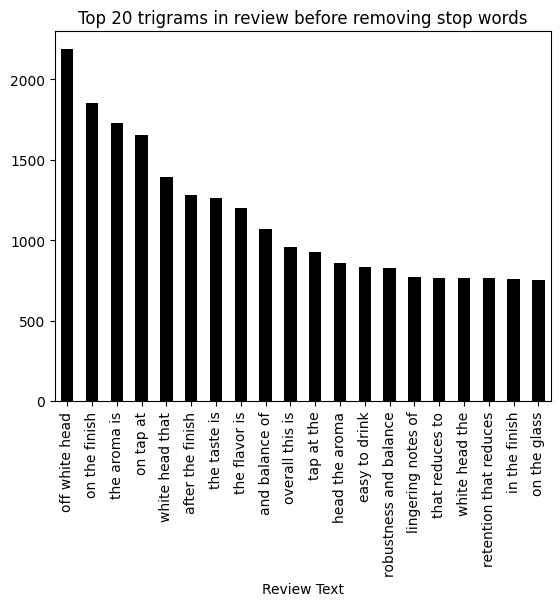

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_trigrams = get_top_n_trigram(ratings_MatchedBeer_RB['text.1'], 20)
for trigram, freq in common_trigrams:
    print(trigram, freq)
df3 = pd.DataFrame(common_trigrams, columns = ['Review Text', 'count'])
df3.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 trigrams in review before removing stop words')

# Distribution of top trigrams after removing stop words

white head aroma 1233
complexity robustness balance 746
lacing clings glass 719
finish lingering notes 691
color white head 677
head good retention 626
serving type bottlereviewed 577
small white head 560
soapy lacing clings 528
white head good 482
good retention reduces 480
floral grassy earthiness 461
cloying flavors finish 424
color finger dense 421
frothy white head 419
bitterness finish lingering 414
balance zero cloying 410
spotty soapy lacing 407
zero cloying flavors 399
aromas good balance 393


<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='Review Text'>

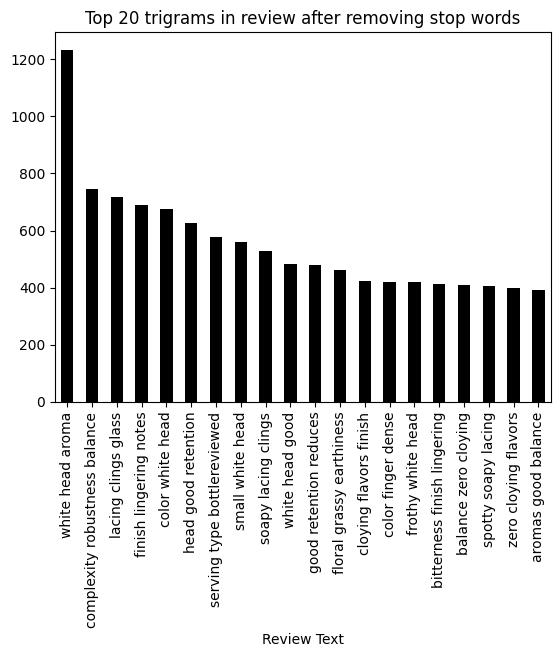

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_trigrams = get_top_n_trigram(ratings_MatchedBeer_RB['text.1'], 20)
for trigram, freq in common_trigrams:
    print(trigram, freq)
df3 = pd.DataFrame(common_trigrams, columns = ['Review Text', 'count'])
df3.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot( kind='bar', y='Count', color='black', title='Top 20 trigrams in review after removing stop words')